# This practice will cover learning points in class2
### 1 - Fit MLR model in python with sklearn and statesmodel packages
### 2 - Model Selection
### 3 - Weighted regression
### 4 - Regularization, L1 and L2

Import required Python packages.

In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


no display found. Using non-interactive Agg backend


C:\ProgramData\Anaconda3\lib\site-packages\dmba\__init__.py:13: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Progr

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [2]:
DATA = Path('.').resolve().parents[1] / 'Practice/mlr/'

HOUSE_CSV = DATA / 'house_sales.csv'

In [3]:
# print(DATA)
print(HOUSE_CSV)

D:\Python\onecareer\DataScienceProgram\Class2\Practice\mlr\house_sales.csv


#### Data read and train-test split

In [4]:
houseall = pd.read_csv(HOUSE_CSV, sep='\t')

house, house_test = train_test_split(houseall, test_size=0.2)

print(house.head())
print(house.shape)

print(house_test.head())
print(house_test.shape)

      DocumentDate  SalePrice  PropertyID   PropertyType          ym  zhvi_px  \
13337   2006-02-27     395000  3904901410  Single Family  2006-02-01   387600   
24136   2006-06-14     385000  8718500320  Single Family  2006-06-01   404400   
1682    2013-04-03     810000   650000005  Single Family  2013-04-01   356000   
1081    2009-03-23     195000   421000185  Single Family  2009-03-01   369800   
4120    2008-02-05     309000  1446100050      Multiplex  2008-02-01   418400   

       zhvi_idx  AdjSalePrice  NbrLivingUnits  SqFtLot       ...         \
13337  0.890625      443509.0               1     4661       ...          
24136  0.929228      414322.0               1     7881       ...          
1682   0.818015      990202.0               1     9112       ...          
1081   0.849724      229486.0               1     4700       ...          
4120   0.961397      321407.0               2     7401       ...          

       Bathrooms  Bedrooms  BldgGrade  YrBuilt  YrRenovated  T

We can use the `LinearRegression` model from _scikit-learn_.

## 1 - Multiple Linear Regression (SKlearn)

In [5]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']

print(house[subset].head())

       AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
13337      443509.0           1490     4661       2.25         3          7
24136      414322.0           1880     7881       1.75         3          7
1682       990202.0           1880     9112       2.00         3          8
1081       229486.0            700     4700       1.00         2          5
4120       321407.0           1990     7401       2.00         4          7


In [6]:
print(house.head())
print(house.columns)

      DocumentDate  SalePrice  PropertyID   PropertyType          ym  zhvi_px  \
13337   2006-02-27     395000  3904901410  Single Family  2006-02-01   387600   
24136   2006-06-14     385000  8718500320  Single Family  2006-06-01   404400   
1682    2013-04-03     810000   650000005  Single Family  2013-04-01   356000   
1081    2009-03-23     195000   421000185  Single Family  2009-03-01   369800   
4120    2008-02-05     309000  1446100050      Multiplex  2008-02-01   418400   

       zhvi_idx  AdjSalePrice  NbrLivingUnits  SqFtLot       ...         \
13337  0.890625      443509.0               1     4661       ...          
24136  0.929228      414322.0               1     7881       ...          
1682   0.818015      990202.0               1     9112       ...          
1081   0.849724      229486.0               1     4700       ...          
4120   0.961397      321407.0               2     7401       ...          

       Bathrooms  Bedrooms  BldgGrade  YrBuilt  YrRenovated  T

In [31]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -502691.533
Coefficients:
 SqFtTotLiving: 235.15166563405077
 SqFtLot: -0.06951651908500905
 Bathrooms: -14069.12863414638
 Bedrooms: -54658.863988289275
 BldgGrade: 103454.13271908204


### Assessing the Model with performance KPIs
_Scikit-learn_ provides a number of metrics to determine the quality of a model. Here we use the `r2_score` and `RMSE`.

In [32]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

fitted_test = house_lm.predict(house_test[predictors])
RMSE_test = np.sqrt(mean_squared_error(house_test[outcome], fitted_test))
r2 = r2_score(house_test[outcome], fitted_test)
print(f'RMSE_test: {RMSE:.0f}')
print(f'r2_test: {r2:.4f}')

RMSE: 268604
r2: 0.5324
RMSE_test: 268604
r2_test: 0.5795


## 1 - Multiple Linear Regression (statsmodels)

While _scikit-learn_ provides a variety of different metrics, _statsmodels_ provides a more in-depth analysis of the linear regression model. This package has two different ways of specifying the model, one that is similar to _scikit-learn_ and one that allows specifying _R_-style formulas. Here we use the first approach. As _statsmodels_ doesn't add an intercept automaticaly, we need to add a constant column with value 1 to the predictors. We can use the _pandas_ method assign for this.

In [9]:
mlr_sm = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = mlr_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     4131.
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:35:07   Log-Likelihood:            -2.5263e+05
No. Observations:               18149   AIC:                         5.053e+05
Df Residuals:                   18143   BIC:                         5.053e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   235.1517      4.511     52.126

### Correlations between predictors

Correlation Matrix 
                SqFtTotLiving   SqFtLot  Bathrooms  Bedrooms  BldgGrade
SqFtTotLiving       1.000000  0.194475   0.764851  0.617503   0.769859
SqFtLot             0.194475  1.000000   0.107217  0.069536   0.145469
Bathrooms           0.764851  0.107217   1.000000  0.553942   0.658738
Bedrooms            0.617503  0.069536   0.553942  1.000000   0.376697
BldgGrade           0.769859  0.145469   0.658738  0.376697   1.000000


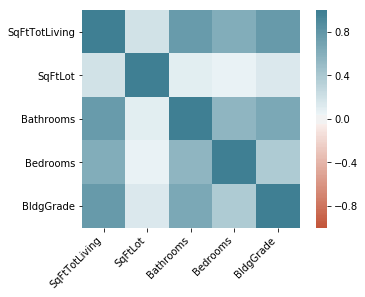

In [10]:
corr = house[predictors].corr()
print("Correlation Matrix \n {}".format(corr))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## 2 - Model Selection and Stepwise Regression

In [11]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

print(house[predictors].head())

print("\n PropertyType List \n{}".format(house['PropertyType'].value_counts(dropna=False)))

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

print("\nPredictors after nominal varibale(s) treatment: {} \n\n".format(X.shape))

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

       SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade   PropertyType  \
13337           1490     4661       2.25         3          7  Single Family   
24136           1880     7881       1.75         3          7  Single Family   
1682            1880     9112       2.00         3          8  Single Family   
1081             700     4700       1.00         2          5  Single Family   
4120            1990     7401       2.00         4          7      Multiplex   

       NbrLivingUnits  SqFtFinBasement  YrBuilt  YrRenovated  NewConstruction  
13337               1                0     1985            0            False  
24136               1                0     1958            0            False  
1682                1                0     1951            0            False  
1081                1                0     1953            0            False  
4120                2                0     1978            0            False  

 PropertyType List 
Single Family    1

We can use the `stepwise_selection` method from the _dmba_ package.

In [12]:
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=519064.57, constant
Step: score=507333.14, add SqFtTotLiving
Step: score=505656.97, add BldgGrade
Step: score=503687.65, add YrBuilt
Step: score=503289.22, add Bedrooms
Step: score=503103.42, add Bathrooms
Step: score=503046.66, add PropertyType_Townhouse
Step: score=503046.66, unchanged None

Intercept: 6441146.303
Coefficients:
 SqFtTotLiving: 206.71172192661047
 BldgGrade: 135052.03726977098
 YrBuilt: -3680.392245661686
 Bedrooms: -60224.71846210909
 Bathrooms: 50615.89037188609
 PropertyType_Townhouse: 62956.51902116502


## 3 - Weighted regression
For the house data recent sale price is more relavent for future prediction, old sale data is less reliable, therefore, we like to emphasis the recent sale data by apply more weight. We will use year the house sale to 2005 as weight.

We can calculate the Year from the date column using either a list comprehension or the data frame's `apply` method.

In [13]:
print("\nDocumentDate List \n{}".format(house['DocumentDate'].value_counts(dropna=False)))


DocumentDate List 
2006-07-26    50
2006-08-24    47
2006-06-19    44
2006-06-28    44
2006-06-13    43
2006-04-25    43
2006-06-21    42
2006-06-01    42
2006-07-18    41
2006-06-08    41
2006-05-22    41
2006-10-10    40
2006-05-01    40
2006-05-30    40
2006-08-21    40
2006-04-26    39
2006-08-25    39
2006-03-22    38
2006-02-21    38
2006-08-01    38
2006-03-20    37
2006-07-24    37
2006-05-08    37
2006-06-12    36
2006-08-04    36
2007-04-23    36
2006-05-25    36
2006-07-11    35
2006-09-27    35
2006-06-22    35
              ..
2014-11-26     1
2014-05-06     1
2013-09-15     1
2011-03-27     1
2011-12-19     1
2006-07-30     1
2011-11-20     1
2010-01-30     1
2007-08-18     1
2013-03-01     1
2013-10-14     1
2011-12-28     1
2007-09-01     1
2013-05-23     1
2007-01-21     1
2012-05-19     1
2014-10-14     1
2012-01-01     1
2011-02-04     1
2011-12-07     1
2014-04-16     1
2012-08-28     1
2009-03-20     1
2011-04-19     1
2007-04-01     1
2014-11-24     1
2008-05-17 

In [14]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]  #list comprehension
house['Year'] = house.DocumentDate.apply(lambda d: int(d.split('-')[0]))  # apply()
house['Weight'] = house.Year - 2005

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [15]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)
pd.DataFrame({
    'predictor': predictors,
    'house_lm': house_lm.coef_,
    'house_wt': house_wt.coef_,
}).append({
    'predictor': 'intercept', 
    'house_lm': house_lm.intercept_,
    'house_wt': house_wt.intercept_,
}, ignore_index=True)

,house_lm,house_wt,predictor
0,235.151666,247.130647,SqFtTotLiving
1,-0.069517,-0.292431,SqFtLot
2,-14069.128634,-22061.286496,Bathrooms
3,-54658.863988,-57237.540337,Bedrooms
4,103454.132719,113439.797537,BldgGrade
5,-502691.533096,-571475.146905,intercept


       Year  abs_residual_lm  abs_residual_wt
13337  2006     67601.770155     75394.434407
24136  2006     60105.100568     60262.534729
1682   2013    415923.623707    408052.971430
1081   2009    174014.287807    198681.497145
4120   2008    120744.005570    117749.410655


Year   Abs_residual_lm    Abs_residual_wt
2006 141794.32045840277 147099.00507013567

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)



2007 149396.78850176246 154001.32339135767
2008 145972.1711946496 149628.58421683635
2009 147336.83787407534 150852.96680312374
2010 164479.4563120265 167387.2665834909
2011 174345.10628984668 177197.40206624396
2012 175549.82705213063 177784.7926013061
2013 199856.97640828573 202297.2204303774
2014 190443.14077074692 192211.5532949705
2015 159951.0541751008 158585.34950897907


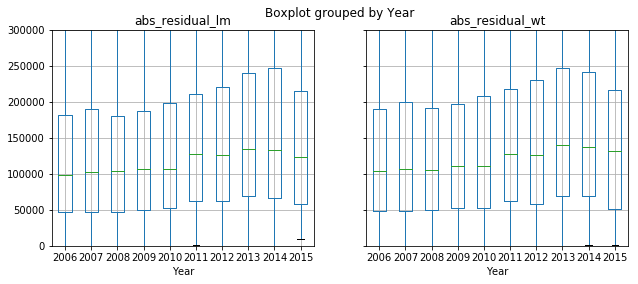

In [16]:
residuals = pd.DataFrame({
    'abs_residual_lm': np.abs(house_lm.predict(house[predictors]) - house[outcome]),
    'abs_residual_wt': np.abs(house_wt.predict(house[predictors]) - house[outcome]),
    'Year': house['Year'],
})
print(residuals.head())
axes = residuals.boxplot(['abs_residual_lm', 'abs_residual_wt'], by='Year', figsize=(10, 4))
axes[0].set_ylim(0, 300000)

print("\n\nYear   Abs_residual_lm    Abs_residual_wt")
for year, group in residuals.groupby('Year'):
    print(year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt']))

Seems only help 2015 prediction reduce the residuale.If we have a recent holdout sample we can test the weight could help for furture prediction or not

# 4 - Regularization

In [17]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

outcome = 'AdjSalePrice'

print(house[predictors].head())

print("\n PropertyType List \n{}".format(house['PropertyType'].value_counts(dropna=False)))

X_train = pd.get_dummies(house[predictors], drop_first=True)
X_train['NewConstruction'] = [1 if nc else 0 for nc in X_train['NewConstruction']]
y_train = house[outcome]

X_test = pd.get_dummies(house_test[predictors], drop_first=True)
X_test['NewConstruction'] = [1 if nc else 0 for nc in X_test['NewConstruction']]
y_test = house_test[outcome]

       SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade   PropertyType  \
13337           1490     4661       2.25         3          7  Single Family   
24136           1880     7881       1.75         3          7  Single Family   
1682            1880     9112       2.00         3          8  Single Family   
1081             700     4700       1.00         2          5  Single Family   
4120            1990     7401       2.00         4          7      Multiplex   

       NbrLivingUnits  SqFtFinBasement  YrBuilt  YrRenovated  NewConstruction  
13337               1                0     1985            0            False  
24136               1                0     1958            0            False  
1682                1                0     1951            0            False  
1081                1                0     1953            0            False  
4120                2                0     1978            0            False  

 PropertyType List 
Single Family    1

### Regular Multiple Regression

In [18]:
house_lm = LinearRegression()
house_lm.fit(X_train, y_train)

mlr_coefs = dict(
    zip(['Intercept'] + X_train.columns.tolist()[:-1], 
        np.round(np.concatenate((house_lm.intercept_, house_lm.coef_), 
                                axis=None), 3))
)

mlr_coefs

{'Bathrooms': 51028.276,
 'Bedrooms': -59943.136,
 'BldgGrade': 135622.76,
 'Intercept': 6375181.854,
 'NbrLivingUnits': 11219.108,
 'NewConstruction': -1084.996,
 'PropertyType_Single Family': 33199.127,
 'SqFtFinBasement': 4.871,
 'SqFtLot': 0.085,
 'SqFtTotLiving': 204.165,
 'YrBuilt': -3670.919,
 'YrRenovated': -1.811}

In [19]:
fitted_test = house_lm.predict(X_test)
MSE_test = np.sqrt(mean_squared_error(y_test, fitted_test))
r2 = r2_score(y_test, fitted_test)
print(f'regular mlr MSE: {MSE_test:.0f}')
print(f'r2_test: {r2:.4f}')

regular mlr MSE: 215046
r2_test: 0.6315


### L2 - Ridge regression (Parameter shrinkage)

In [40]:
ridge_cv = RidgeCV(normalize=True, alphas=np.logspace(-10, 1, 400))
ridge_model = ridge_cv.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_test)
ridge_mae = np.mean(np.abs(y_test - ridge_prediction))
ridge_coefs = dict(
    zip(['Intercept'] + X_train.columns.tolist()[:-1], 
        np.round(np.concatenate((ridge_model.intercept_, ridge_model.coef_), 
                                axis=None), 3))
)

print('Ridge Regression MAE: {}'.format(np.round(ridge_mae, 3)))
print('Ridge Regression coefficients:')
ridge_coefs

Ridge Regression MAE: 133846.01
Ridge Regression coefficients:


{'Bathrooms': 51886.714,
 'Bedrooms': -58557.365,
 'BldgGrade': 135538.042,
 'Intercept': 6272581.411,
 'NbrLivingUnits': 5992.061,
 'NewConstruction': -1131.61,
 'PropertyType_Single Family': 23226.507,
 'SqFtFinBasement': 7.308,
 'SqFtLot': 0.094,
 'SqFtTotLiving': 200.41,
 'YrBuilt': -3610.529,
 'YrRenovated': -0.85}

### L1 - Lasso regression (Parameter sparsity)

In [21]:
lasso_cv = LassoCV(normalize=True, alphas=np.logspace(-10, 1, 400))
lasso_model = lasso_cv.fit(X_train, y_train)
lasso_prediction = lasso_model.predict(X_test)
lasso_mae = np.mean(np.abs(y_test - lasso_prediction))
lasso_coefs = dict(
    zip(['Intercept'] + X_train.columns.tolist()[:-1], 
        np.round(np.concatenate((lasso_model.intercept_, lasso_model.coef_), axis=None), 3))
)

print('LASSO MAE: {}'.format(np.round(lasso_mae, 3)))
print('LASSO coefficients:')
lasso_coefs

LASSO MAE: 133489.541
LASSO coefficients:


{'Bathrooms': 47191.806,
 'Bedrooms': -56089.484,
 'BldgGrade': 135394.271,
 'Intercept': 6155147.23,
 'NbrLivingUnits': -0.0,
 'NewConstruction': -0.0,
 'PropertyType_Single Family': -0.0,
 'SqFtFinBasement': 4.991,
 'SqFtLot': 0.043,
 'SqFtTotLiving': 201.375,
 'YrBuilt': -3534.963,
 'YrRenovated': 0.0}

# Home Work

1. Compare the three model fits and draw conclusion 
from the comparision of the three model firt regarding there coefficent difference

In [48]:

pd.DataFrame({
    'predictor': predictors,
    'MLR': house_lm.coef_,
    'Weighted': house_wt.coef_,
    'Stepwise': house_wt.coef_,
    
}).append({
    'predictor': 'intercept', 
    'MLR': house_lm.intercept_,
    'Weighted': house_wt.intercept_,
    'Stepwise': best_model.intercept_,
    
}, ignore_index=True)


,MLR,Stepwise,Weighted,predictor
0,235.151666,2.471306e+02,247.130647,SqFtTotLiving
1,-0.069517,-2.924306e-01,-0.292431,SqFtLot
2,-14069.128634,-2.206129e+04,-22061.286496,Bathrooms
3,-54658.863988,-5.723754e+04,-57237.540337,Bedrooms
4,103454.132719,1.134398e+05,113439.797537,BldgGrade
5,-502691.533096,6.441146e+06,-571475.146905,intercept


In [50]:

pd.DataFrame({
    'Ridge': ridge_coefs,
    'Lasso': lasso_coefs
})


,Lasso,Ridge
Bathrooms,47191.806,51886.714
Bedrooms,-56089.484,-58557.365
BldgGrade,135394.271,135538.042
Intercept,6155147.230,6272581.411
NbrLivingUnits,-0.000,5992.061
NewConstruction,-0.000,-1131.610
PropertyType_Single Family,-0.000,23226.507
SqFtFinBasement,4.991,7.308
SqFtLot,0.043,0.094
SqFtTotLiving,201.375,200.410


2. Show the three model performance on both tran and test

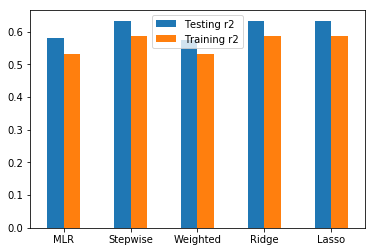

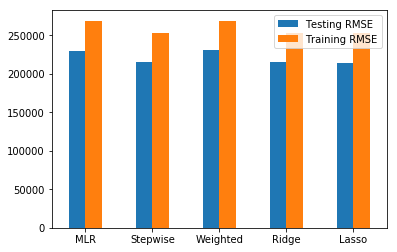

In [37]:
RMSE_tra=[]
RMSE_tes=[]
r2_tra=[]
r2_tes=[]
#1 MLR
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
fitted = house_lm.predict(house[predictors])
RMSE_tra.append(np.sqrt(mean_squared_error(house[outcome], fitted)))
r2_tra.append(r2_score(house[outcome], fitted))

fitted_test = house_lm.predict(house_test[predictors])
RMSE_tes.append(np.sqrt(mean_squared_error(house_test[outcome], fitted_test)))
r2_tes.append(r2_score(house_test[outcome], fitted_test))

#2 Stepwise Regression
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']
X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]
fitted = best_model.predict(X[best_variables])
RMSE_tra.append(np.sqrt(mean_squared_error(house[outcome], fitted)))
r2_tra.append(r2_score(house[outcome], fitted)) 

X = pd.get_dummies(house_test[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]
fitted_test = best_model.predict(X[best_variables])
RMSE_tes.append(np.sqrt(mean_squared_error(house_test[outcome], fitted_test)))
r2_tes.append(r2_score(house_test[outcome], fitted_test))

#3 Weighted regression
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

fitted = house_wt.predict(house[predictors])
RMSE_tra.append(np.sqrt(mean_squared_error(house[outcome], fitted)))
r2_tra.append(r2_score(house[outcome], fitted))

fitted_test = house_wt.predict(house_test[predictors])
RMSE_tes.append(np.sqrt(mean_squared_error(house_test[outcome], fitted_test)))
r2_tes.append(r2_score(house_test[outcome], fitted_test))

#4 Ridge
fitted = ridge_model.predict(X_train)
RMSE_tra.append(np.sqrt(mean_squared_error(y_train, fitted)))
r2_tra.append(r2_score(y_train, fitted))

fitted_test = ridge_model.predict(X_test)
RMSE_tes.append(np.sqrt(mean_squared_error(y_test, fitted_test)))
r2_tes.append(r2_score(y_test, fitted_test))

#5 Lasso
fitted = lasso_model.predict(X_train)
RMSE_tra.append(np.sqrt(mean_squared_error(y_train, fitted)))
r2_tra.append(r2_score(y_train, fitted))

fitted_test = lasso_model.predict(X_test)
RMSE_tes.append(np.sqrt(mean_squared_error(y_test, fitted_test)))
r2_tes.append(r2_score(y_test, fitted_test))

#plot r2
index = ['MLR', 'Stepwise', 'Weighted','Ridge','Lasso']
df = pd.DataFrame({'Training r2': r2_tra,
                   'Testing r2': r2_tes}, index=index)
ax = df.plot.bar(rot=0)

#plot RMSE
df = pd.DataFrame({'Training RMSE': RMSE_tra,
                   'Testing RMSE': RMSE_tes}, index=index)
ax = df.plot.bar(rot=0)
